# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [20]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The white smartcab starts in a random position each time the simulation is started. The smartcab in its current implementation does not move. It still however receives awards based on some rules of the environment. The other vehicles are moving in the grid world. The other vehicles either stay still, go straight, turn left, or turn right. They automatically move to the front of the next intersection. They do not have to wait behind other cars at an intersecion. They seem to follow the US right of way rules as described in the project description on the Udacity Project Page. The cars do not make U turns.

There are both positive and negative rewards. Some cases of rewards I have observed:

Reward for being idle at a red light (small positive reward)
Reward for being idle at green light with no oncoming traffic ( large negative reward)
Reward for being idle at green light with oncoming trafic (small positive reward)

The rewards are not constants. The world with these types of rewards encourages caution when moving through an intersection.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Examples of three flags in agent.py that can change the simulation: 

1) Seting the number of dummy agents (num_dummies) that will be in the environment in addition to the primary agent. This could change the chances of having an accident since there would be more or less cars transversing the grid. 

2) Changint the grid_size when creating the environment. This could impact the simulation by making it more or less difficult for the smartcab to meet a set deadline. For example if the grid was larger the smartcab would have to make more correct actions to meet a deadline when compared to a smaller grid size.

3) Set learning to be true when creating the LearningAgent. This will allow Q-learning of the environment to take place if the algorithm is implemented.

The act function in environment.py is called when an agent performs an action.

Within simulator.py render_text reports game information over time as text outputted to the terminal. Render shows game changes on a pygame GUI if enabled.

Within planner.py next_waypoint() checks the East-West direction first. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


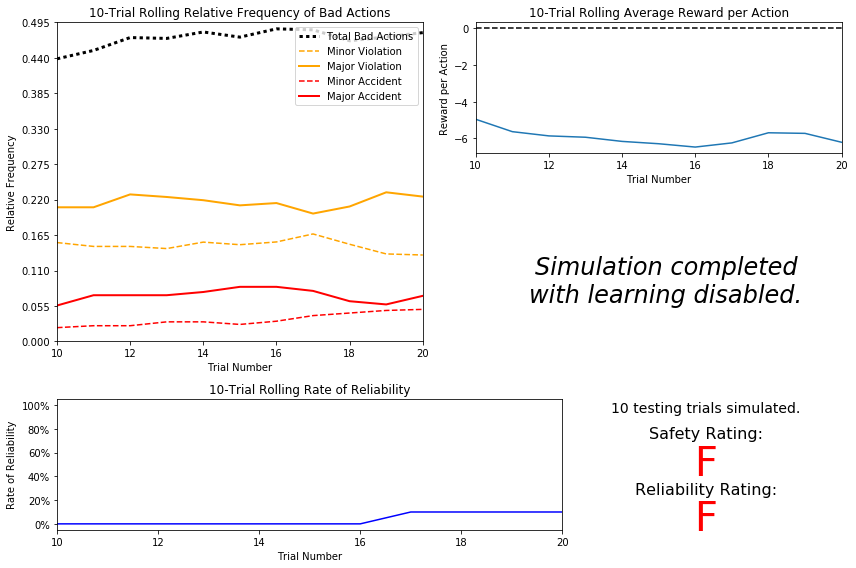

In [21]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** The testing outcome of using a randomly moving smart agent in the grid world resulted in both a safety and reliability rating of an F. Since the agent is moving randomly and not trying to move towards the destination, most trials end up taking the maximum amount of time dictated by the deadline unless ended early due to the smartcab by chance finding the destination. This gives the smartcab many attempts at randomly producing a major accident. In this simulation this did occur, and is reflected by the simulation outputting a safety rating of an F. Furthermore since most if not all testing trials ended due to reaching the timing deadline the simulation produced a reliability rating of an F. 

From the plot above the rolling relative frequency of making a generally bad action during training approached 0.5. More exploration would need to be done to determine if this would match up with what is theoretically expected. To do this exploration it would need to be detailed how many scenarios would lead to a violation versus how many scenarios would not lead to a violation. This exercise would also need to take into account that the other cars always follow traffic laws. Around .12/.5 of the bad decisions are accidents in the current simulation.

During training the rolling rate of reliability is very low between 0 and 20%. The jump in reliability is only seen because the smartcab was able to raech its destination a few times during the last several training trials by chance.

Since the smartcab has around a 0.5 relative frequency of making a bad decision, rewards are expected to be generally negative. This is seen in the rolling reward average being between -4 and -6. The rewards may also be negativily weighted due to the large negative penalties for commiting violations (especially accidents). We also see the rolling reward average decrease towards the last few training trials where the frequency of minor+major accidents was greatest. 

Curently this smartcab implementation would not be safe or reliable for its passengers. The frequency of major violations would present a significant risk to passengers. Furthermore the inability of the smartcab to meet its deadlines would not make it a reliable mode of transportation leading to a long to long list of problems such as loss of productivity, mistrust of the smartcab vendor etc.





-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
I will include: waypoint, inputs['light'], inputs['oncoming'], and inputs['left']
I will not include: inputs['right']

1) Waypoint: The waypoint is important for reliability. Without knowing the direction in which to head next to get to the destination the smartcab will often be taking the non-optimal path to the destination. This could lead to frequent deadline timeouts.

2) Included Input features: I believe all three of the input features I included are most relevant to safety. Since the smartcab is able to continue on its path even if it conducts a violation, knowing information about the traffic light and other vehicle movements becomes irrelevant in terms of reliability. However since the smartcab's movement in conjunction with the state of traffic lights and the movement of other vehicles define violation types they indirectly define the smartcab's safety rating. 

3) Excluded Input feature: See (2) arguement for why Input['Right'] would not impact reliability. Input['Right'] would also not impact safety. If the vehicle to the right was to turn right on red, it would be forced to check for the smartcab going forward before turning (Since all dummy agents are required to follow US right of way laws). If the smartcab was turning right it would not be in the same direction as any movement possible by the vehicle to its right. If the smartcab was turning left that would mean the traffic light for the vehicle to the right was red. Similarly the traffic light would be red for the vehicle to the smartcab's right when the smartcab tried to go forward. Thus in each case knowledge of the vehicle to the right was unneeded or redundant.

4) Excluded deadline: I did not include the deadline feature for the following reasons. It would increase the state space enormously since the deadline takes on a range of values. This is similar to the time of day concept described in the define a state space section below. If for a given grid_size a reasonable deadline was set (by this I mean actually achievable for the smartcab starting in the furthest location from the destination and taking into account some time for stopping at someintersections) I think learning the rules of US right of way driving to a destiantion through Q-learning should produce actions that meet a reasonable deadline most of the time. Additionally since meeting a deadline does not impact rewards, it would not impact Q-learning in this project.   

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**The size of my defined state space would be 96 using the waypoint, inputs['oncoming'], inputs['light'], and inputs['left'] features. This is because waypoint can take on 3 values, inputs['left'] and inputs['oncoming'] can take on 4 values each, and inputs['light'] can take on 2 values. Thus the total number of possible states would be 3x4x4x2=96.

I believe the smartcab should be able to atleast visit each state within a reasonable number of training trials. Especially since during each trial the smartcab takes multiple steps each of which having the chance to lead the smartcab to a different state. Learning more accurate Q-values of each state may require visiting multiple times but I think this could still be done in a reasonable amount of time.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

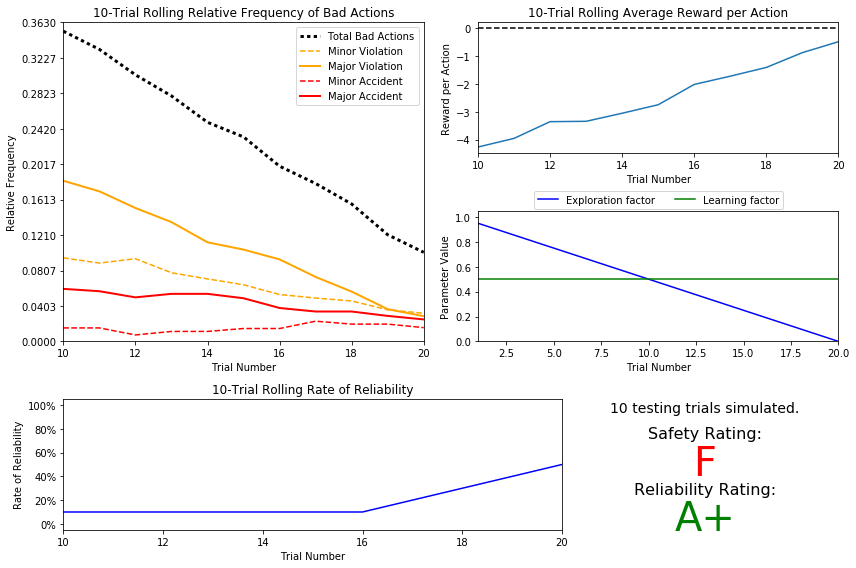

In [22]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** It looks like the agent is properly learning about its environment since the rolling rate of reliability, rolling relative frequency of bad actions, and rolling average reward are moving in directions indiciating better performance. 

This is unlike the previous result from the randomly moving smart agent where these parameter curves may have had some inflections but did not seem to be moving very distinctly in a particular direction. For the initial Q-learning implementation reliability had an A+ rating as the smartcab reached its destination within the deadline for all test trials. The rolling average reward was still negative, and the rolling reliability was stlil about 50% at the end of training. However, it seems when exploration had become less common during the last 5 trials, the agent had learned well enough to meet deadlines and make proper decisions leading to increases in both the rolling average reward and reliabilty. Thus it could be the case that if more training trials were conducted with no exploration and only exploitation/learning we would actually see the rolling average for reliability converge to some very high percentage, and the rolling reward converge to something positive. If this is the case than the observed A+ reliability rating could make sense, because no exploration would be happening and the smartcab would be using its learned policy that moves the smartcab in an efficient manner to meet deadlines.   

Safety however remained an F. This is likely because major accidents were still occuring at the end of training (although the rolling relative frequency was decreasing as training progressed). Perhaps if there were more training trials this rolling frequency of major accidents could converge close enough to 0 so that the safety rating would improve from an F during the 10 testing trials.

This implementation is properly decaying epsilon by 0.05 per trial as seen in the parameters panel. The shape of the decay is a linear line (also as expected). Using this decay function about 20 trials were needed before testing began. Which makes since it would take 20 trials for epsilon to become 0 (which is the trial number that epislon meets the less than 0.05 tolerance condition).  

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

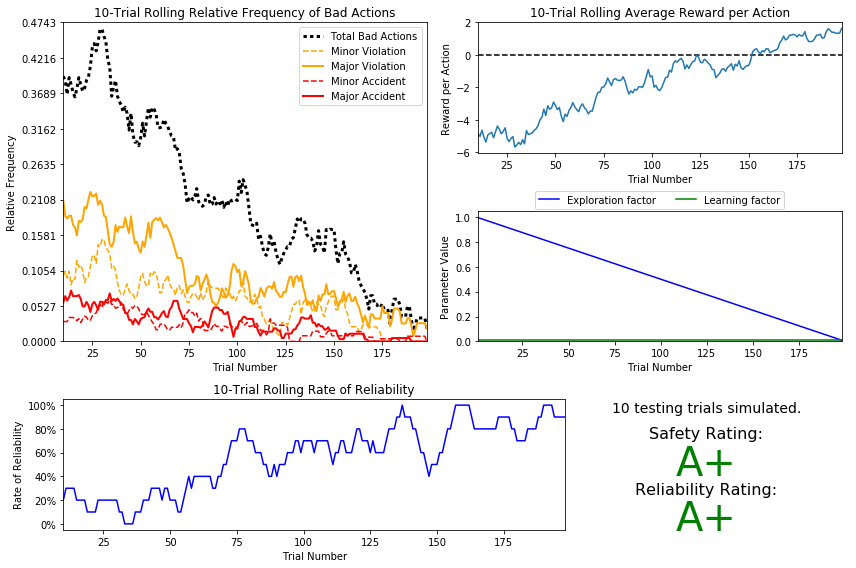

In [32]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**


I continued to use a linear epsilon decay function. I however changed the decay rate to be lower from 0.05 to 0.005. This would increase the number of training trials in order to reach the epsilon tolerance before testing began. This would also allow for there to be more trials where the exploration probability was > 0.5. Thus the smartagent would encounter all possible states more often. I also changed the epsilon tolerance to be lower from 0.05 to 0.01. This also increased the number of training trials. However during the extra trials due to this lower tolerance, the smart agent would be reinforcing the policy it had learned during the earlier more explorative trials. This is because most movement would be based on choosing an action based on the Q-table. These changes resulted in 199 training trials in order to reach the epsilon tolerance to begin testing.

I chose to use an alpha of 0.01. This is because I wanted the smartcab to be conservative in changing its behavior. This would require more samples of rewards for each state in order to get a reasonable Q-value estimate. However I think this is appropriate because there is some randomness in the definition of rewards (Based on the envionment.py code). However since I have increased the number of training trials with a slower decay and lower tolerance I think I should be able to stil get enough samples to learn in this conservative manner. I also hope this would reduce variability that would be seen if the simulation was run multiple times.  

I conducted this simulation with 10 testing trials to keep consistent with previous analyses. With this optimization I was able to achieve a Safety Rating of an A+ and a Reliability Rating of an A+. This is clearly an improvement over the safety rating of an F seen in the implementation. Reliability did not seem to take a toll. 

Since epsilon decay is slower, it takes more training trials for improvements in reliability to be seen. This is expected since more exploration may cause the missing of deadlines. However learning seems to have occurred as rolling reliability tends to settle around 90% towards the end of training. During the last portion of training we also tend to see the rolling reward average climb past 0 and eventually around +1.5. Thus the smartcab is starting to consistently make good decisions. In comparison to the initial implementation where rewards were starting to get better towards the end of training however the rolling average was still negative. 

In the initial implementation since the rolling average of rewards was still somewhat negative, the rolling relative frequency of bad actions was also still somewhat high around 0.12 and minor+major accidents around 0.06. In the optimized implementation the relative frequency of bad actions drops to around 0.045, and minor+major accidents converging close to 0. Thus the slight dips in the rolling rewards in the optimized implementation towards the end of training are likely due to infrequently conducting traffic violations instead of accidents. 

I would say that the smartcab learned an appropriate policy since it is now choosing actions that tend to give good rewards. However I think further analysis would need to be done in order to confirm that the policy would be good enough for real application. In order to truly understand if the decay and learning rate are appropriate I would run the simulation many times and conduct a more detailed statistical analysis to confirm that learning is happening in a consistent way. This would be important if a vender needed to train each smartcab independently during its calibration process.  

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

The optimal policy would follow US right-of-way traffic laws as described above in the define an optimal policy section of the project. Thus I'll describe an optimal policy below following that description:

If waypoint is forward:
    If traffic light is green:
        Go forward since you have the right of way.
    Else:
        Stay still

If waypoint is right:
    If traffic light is green:
        Turn right
    Else:
        If car on left is going through intersection:
            Stay still
        Else:
            Turn right
            
If waypoint is left:
    If traffic light is green:
        If no oncoming traffic going forward or turning right:
            Turn left
    Else:
        Stay still 
            
 
My definition of state in agent.py:

state = (waypoint, inputs['light'], inputs['oncoming'], inputs['left'])

Three examples of my smartcab learning optimal policy:

('left', 'green', None, None)
 -- forward : 0.18
 -- None : -1.74
 -- right : 0.15
 -- left : 1.15
 
 The smartcab should turn left since the light is green, the oncoming and left cars are not moving, and the next waypoint is to the left. The smartcab learns this proper action since left has the highest q value.
 
 ('right', 'green', 'right', None)
 -- forward : 0.01
 -- None : -0.04
 -- right : 0.04
 -- left : -0.97
 
 The smartcab should turn right since the light is green (so it has right of way) and the next waypoint is to the right. The correct action to turn right is learned. 
 
 ('forward', 'green', 'right', 'right')
 -- forward : 0.02
 -- None : -0.04
 -- right : 0.00
 -- left : -0.20

The smartcab should go forward since the next waypoint is forward and the traffic light is green giving it right of way. This action is learned since forward has the highest q value. 

Three examples of my smartcab not learning optimal policy:

('left', 'green', 'forward', 'right')
 -- forward : 0.01
 -- None : -0.05
 -- right : 0.03
 -- left : 0.00
 
 The smartcab should ideally stay still (to wait for oncoming traffic so that it can still get to the next waypoint), but instead learns to go forward. This is not ideal but could have been learned because going forward is still a valid move. Since there are no future rewards staying still on a green light would be considered a violation. 
 

 ('right', 'green', 'forward', 'right')
 -- forward : 0.04
 -- None : -0.10
 -- right : 0.00
 -- left : 0.00
 
 The smartcab should ideally go right, but has learned to tiebreak between turning right and going left. I think this has occurred due to the smartcab not having enough data samples for getting rewards from taking the right or left action. This is indicated by the 0 Q-values for these actions. 0 is what we initialize all Q-values to be. So this must mean that these actions did not get learned at all or the impacts of the few samples that were collected got canceled out due to the small learning rate. 
 
 ('right', 'green', 'forward', 'forward')
 -- forward : 0.02
 -- None : -0.10
 -- right : 0.00
 -- left : -0.40
 
 The smartcab should ideally turn right. However it has learned to go forward. I think this is similar to the first improperly learned sample where the waypoint is not being followed, but a valid action is being taken. 
 
 Based on these observations it seems that my smartcab still has some potential to improve.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.